In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
import numpy as np

#visualization libraries for graphing
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme()


In [2]:
chemin_fichier = 'C:\\Users\\douja\\OneDrive\\Desktop\\Formation Data Analyst\\Projets Fil Rouge_Data\\Données Projet Financement Participatif//Kickstarter Campaigns DataSet.csv'

df = pd.read_csv(chemin_fichier)

In [3]:
#le fichier que l'on va utiliser Kickstarter Campaigns DataSet.csv

df = df.drop(['Unnamed: 0','slug','name', 'creator_id','blurb','id'], axis = 1)
#on va compter les lignes en doubles
print("duplicates: ", df.duplicated().sum())
df.drop_duplicates(inplace=True, ignore_index=True)
# original row-length was 217245. check after removal of duplicates
print("length of dataset after removal of duplicates is ", len(df))

#supprimer les projets canceled et live du Dataset
df= df.loc[(df['status']=='successful') | (df['status']=='failed')]
print(df['status'].unique())


duplicates:  19527
length of dataset after removal of duplicates is  197718
['failed' 'successful']


In [4]:
import pandas as pd
from datetime import datetime


#
df['launched_at'] = pd.to_datetime(df['launched_at'], errors='coerce')

# Vérifier les valeurs de date invalides


# Extraire le jour de la semaine
df['day_of_week'] = df['launched_at'].dt.strftime('%A')

# Afficher le DataFrame modifié

df.head()

,currency,launched_at,backers_count,country,deadline,status,usd_pledged,sub_category,main_category,blurb_length,goal_usd,city,duration,day_of_week
0,CAD,2018-02-10 22:47:52,16,CA,2018-04-11 21:47:52,failed,577.902078,food,Farms,122,785.82065,Victoria,60.0,Saturday
1,USD,2014-11-21 10:42:26,7,US,2014-12-15 10:42:26,successful,211.000000,publishing,Academic,35,93.00000,San Diego,24.0,Friday
2,USD,2020-10-19 05:26:59,99,US,2020-11-18 05:26:59,successful,4697.000000,food,Small Batch,122,1500.00000,Philadelphia,30.0,Monday
3,USD,2019-05-29 16:01:34,3,US,2019-07-28 16:01:34,failed,222.000000,technology,Gadgets,69,25000.00000,Chicago,60.0,Wednesday
4,USD,2015-11-19 20:36:01,100,US,2015-12-19 20:36:01,successful,5410.000000,publishing,Radio & Podcasts,131,5000.00000,Madrid,30.0,Thursday


In [5]:
#Features Preprocessing
from datetime import datetime

df['launched_at'] = pd.to_datetime(df['launched_at'], format='%Y-%m-%d %H:%M')

#df['launched_at'] = df['launched_at'].apply(lambda df: pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M'))

import calendar
df['month'] = df['launched_at'].dt.month
df['year'] = df['launched_at'].dt.year
# Remplacer les mois numériques par les noms des mois
df['month'] = df['month'].apply(lambda x: calendar.month_name[x])
df.head(1)

,currency,launched_at,backers_count,country,deadline,status,usd_pledged,sub_category,main_category,blurb_length,goal_usd,city,duration,day_of_week,month,year
0,CAD,2018-02-10 22:47:52,16,CA,2018-04-11 21:47:52,failed,577.902078,food,Farms,122,785.82065,Victoria,60.0,Saturday,February,2018


In [6]:
data = df[['currency','country','city','sub_category','main_category','day_of_week', 'month', 'year','blurb_length','goal_usd','duration','status']]

data.head()

,currency,country,city,sub_category,main_category,day_of_week,month,year,blurb_length,goal_usd,duration,status
0,CAD,CA,Victoria,food,Farms,Saturday,February,2018,122,785.82065,60.0,failed
1,USD,US,San Diego,publishing,Academic,Friday,November,2014,35,93.00000,24.0,successful
2,USD,US,Philadelphia,food,Small Batch,Monday,October,2020,122,1500.00000,30.0,successful
3,USD,US,Chicago,technology,Gadgets,Wednesday,May,2019,69,25000.00000,60.0,failed
4,USD,US,Madrid,publishing,Radio & Podcasts,Thursday,November,2015,131,5000.00000,30.0,successful


In [7]:
# Encodage de la variable city
city_counts = data['city'].value_counts()
top_10_cities = city_counts.nlargest(10).index

data['city'] = data['city'].str.strip()

# Remplacer les noms de villes qui ne font pas partie des top 10 villes par "Other"
data['city'] = data['city'].apply(lambda x: x if x in top_10_cities else 'Other')

# Appliquer get_dummies() à la colonne 'city' modifiée
dummy_city_columns = pd.get_dummies(data['city'], prefix='city')

# Supprimer la colonne 'city_Other'
dummy_city_columns = dummy_city_columns.drop(['city_Other'], axis=1)

C:\Users\douja\AppData\Local\Temp\ipykernel_1052\131168419.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['city'] = data['city'].str.strip()
C:\Users\douja\AppData\Local\Temp\ipykernel_1052\131168419.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['city'] = data['city'].apply(lambda x: x if x in top_10_cities else 'Other')


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

#Identification des features et target

In [9]:
features = data.drop(['status'], axis = 1)
target = data['status']
features.head()
target

0             failed
1         successful
2         successful
3             failed
4         successful
             ...    
197712    successful
197713        failed
197714        failed
197716    successful
197717    successful
Name: status, Length: 184899, dtype: object

In [10]:
cat_feat = ['currency','country','sub_category','main_category','month','day_of_week']

cat_feat_dummies = pd.get_dummies(features[cat_feat])
cat_feat_dummies.head()

,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,...,month_November,month_October,month_September,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [11]:
feats  = pd.concat([cat_feat_dummies, dummy_city_columns], axis=1)
feats = pd.concat([features[[ 'goal_usd', 'duration', 'blurb_length','year']], feats], axis=1)
feats.head()

,goal_usd,duration,blurb_length,year,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,...,city_Atlanta,city_Brooklyn,city_Chicago,city_London,city_Los Angeles,city_New York,city_Portland,city_San Francisco,city_Seattle,city_Toronto
0,785.82065,60.0,122,2018,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,93.00000,24.0,35,2014,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1500.00000,30.0,122,2020,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25000.00000,60.0,69,2019,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5000.00000,30.0,131,2015,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X_train, X_test,y_train, y_test = train_test_split(feats, target , test_size = 0.2, random_state =42 , stratify = target)


In [13]:
# Encodage de la variable categorielle


y_train = y_train.replace(to_replace=['successful', 'failed'], value = [1,0])

y_test = y_test.replace(to_replace=['successful', 'failed'], value = [1,0])

y_test.head()

43522     0
30160     1
136343    1
115724    1
146824    1
Name: status, dtype: int64

In [14]:

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier



In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

In [16]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:

regressor = RandomForestRegressor(random_state=42, n_estimators=100) 
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

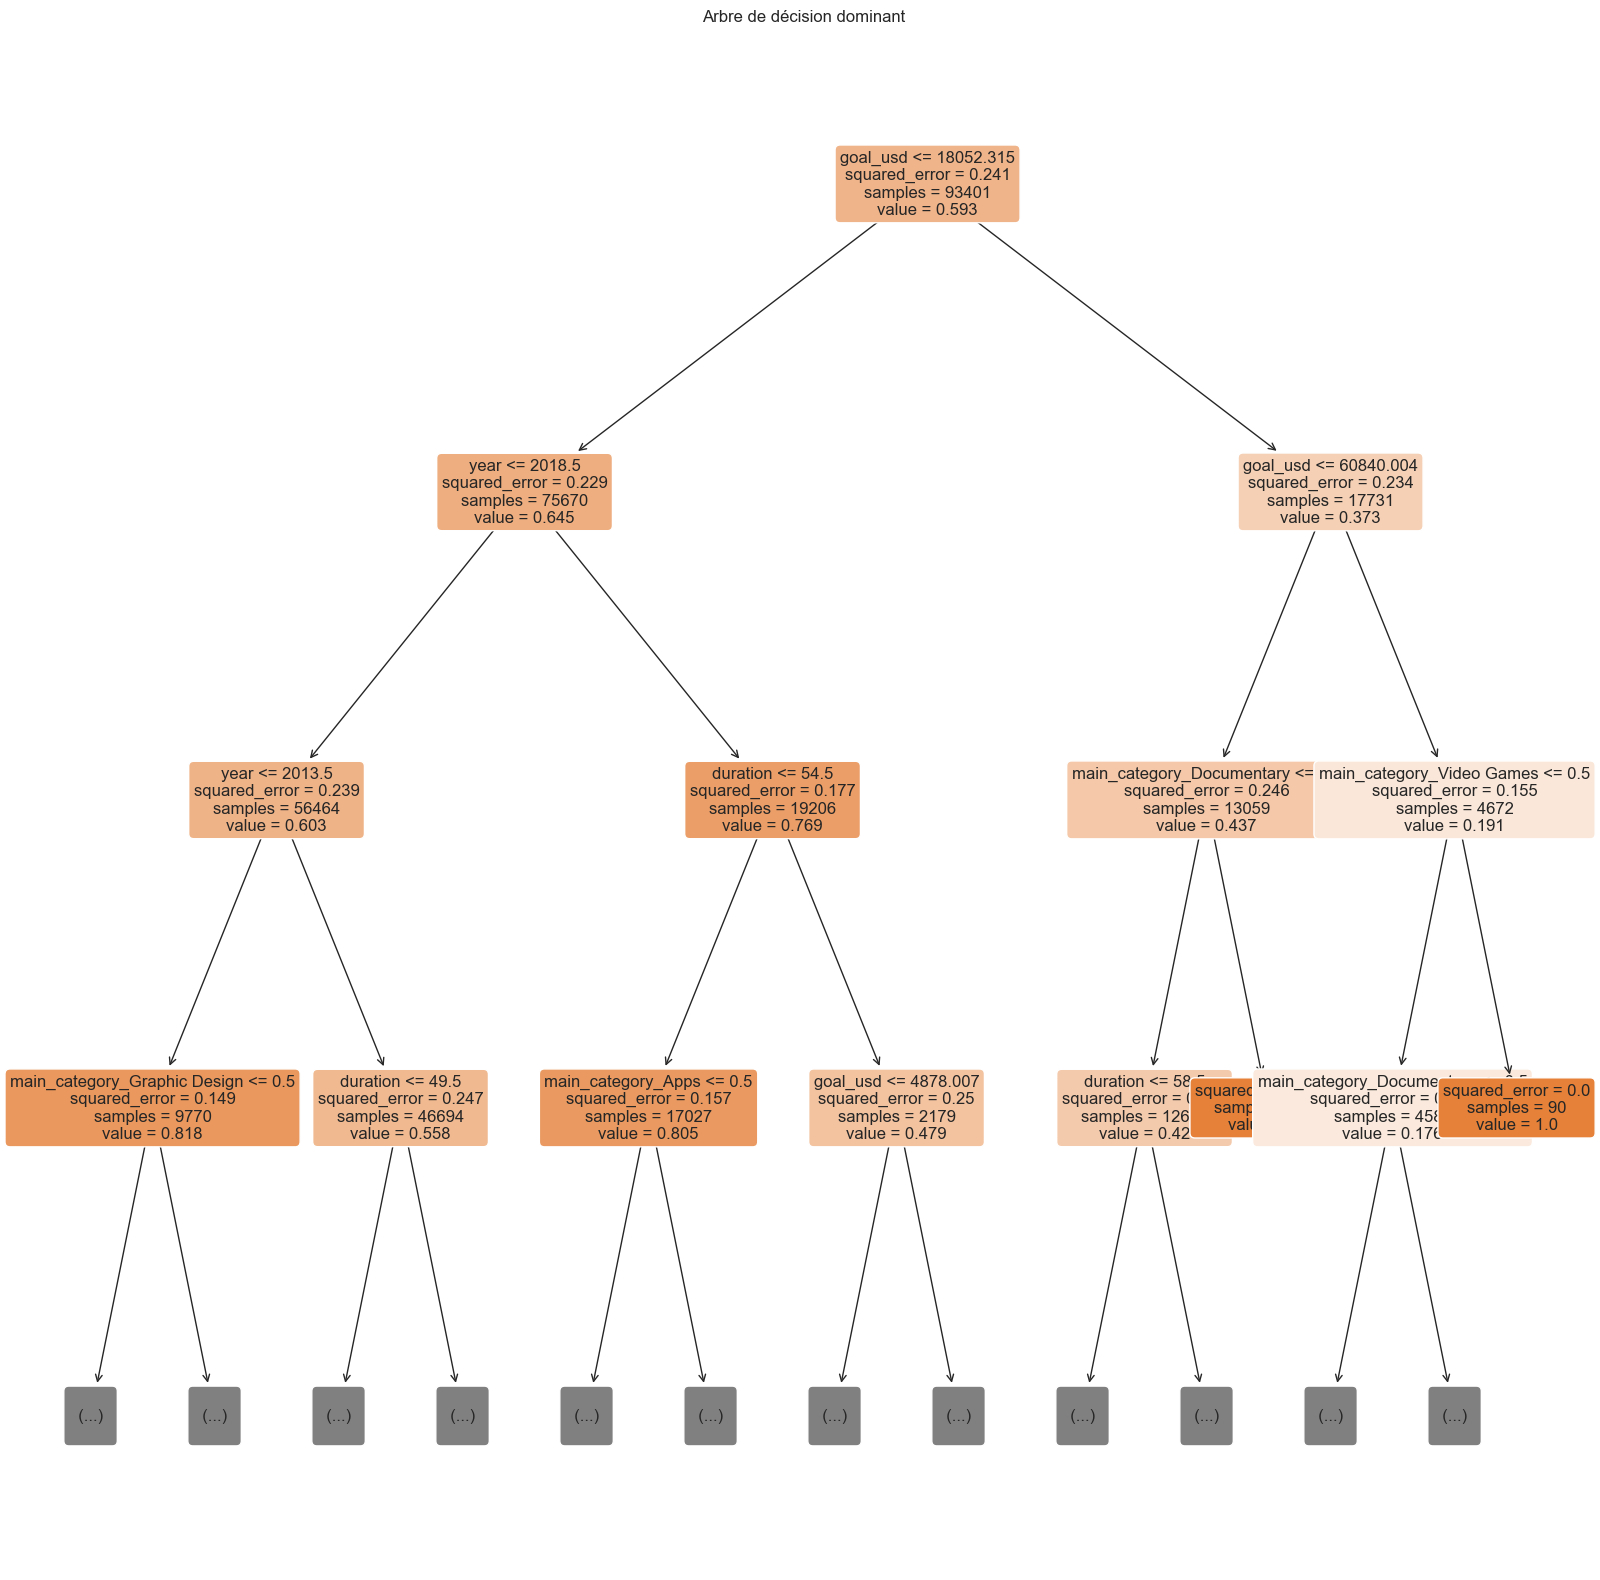

In [18]:
from sklearn.tree import plot_tree

best_tree_idx = np.argmin([tree.tree_.impurity[0] for tree in regressor.estimators_])
best_tree = regressor.estimators_[best_tree_idx]

# Créer une figure et un axe pour afficher l'arbre
fig, ax = plt.subplots(figsize=(20, 20))  

# Utiliser la fonction plot_tree pour afficher l'arbre avec une limite de 5 niveaux
plot_tree(best_tree, 
          feature_names=X_train.columns,  # Utilisez les noms de colonnes comme étiquettes des caractéristiques
          filled=True, 
          rounded=True,
          fontsize=12,
          max_depth=3)  # Limite à 3 niveaux de profondeur

# Afficher l'arbre
plt.title("Arbre de décision dominant")
plt.show()







In [17]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


In [18]:
import shap
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
Permutation explainer:   9%|▉         | 3366/36980 [31:36<5:15:53,  1.77it/s]  


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\douja\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\douja\AppData\Local\Temp\ipykernel_7684\3687697513.py", line 5, in <module>
    shap_values = explainer(X_test)
                  ^^^^^^^^^^^^^^^^^
  File "C:\Users\douja\anaconda3\Lib\site-packages\shap\explainers\_permutation.py", line 76, in __call__
    return super().__call__(
           ^^^^^^^^^^^^^^^^^
  File "C:\Users\douja\anaconda3\Lib\site-packages\shap\explainers\_explainer.py", line 264, in __call__
    row_result = self.explain_row(
                 ^^^^^^^^^^^^^^^^^
  File "C:\Users\douja\anaconda3\Lib\site-packages\shap\explainers\_permutation.py", line 134, in explain_row
    outputs = fm(masks, zero_index=0, batch_size=batch_size)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\douja\anaconda3\Lib\site-packages\shap\utils\_mas

In [19]:
shap.summary_plot(shap_values, X_test)

NameError: name 'shap_values' is not defined

In [ ]:
# Evaluate SHAP values
shap_values = explainer.shap_values(feats)

In [18]:
import shap
import numpy as np

# select a set of background examples to take an expectation over
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]


e = shap.Explainer(model, background)

shap_values = e.shap_values(X_test)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


KeyError: "None of [Int64Index([136837,  14383,  89332,  94504,  33473, 129890, 103369, 124272,\n            104731, 147579, 135759,  80500,  25224,  45073,  55670,  78504,\n             90522, 100645,  69837,  18399,  17430, 109296,  54711, 147573,\n             92305,   1792, 124843,  92487, 108629, 134543,   5214,  12602,\n             88509, 100937,  92103,  98213, 141888, 146609, 111375, 129306,\n            144199,  69268,  57073,  25289,  73631, 113396,   3364, 127754,\n             95813,  24412,  52707, 115973,  83490,  14451, 129928, 135497,\n             91964,  52981,  41749,  42421,  28916, 100441,  83011,  88385,\n             78655,  66097,  12923, 131523,   3761,  30019,  93272,  47848,\n             73917,  44939, 104259, 106605, 146893,  21557,  20207,  74712,\n            139574,  15895,  42903,   5767,  68566, 104354,  20575,  31965,\n            126370, 140760,  90317, 126870,  73059,  10691,  77131,  17020,\n             83351,    217, 139272,  67923],\n           dtype='int64')] are in the [columns]"

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

# Création du modèle Random Forest, préalablement standardisé



X_train[['goal_usd','duration','blurb_length','year']]= scaler.inverse_transform(X_train[['goal_usd','duration','blurb_length', 'year']])
regressor = RandomForestRegressor(random_state=42, n_estimators=100) 
regressor.fit(X_train, y_train)

# Calculer l'arbre dominant (celui avec le critère de Gini moyen le plus faible)
best_tree_idx = np.argmin([tree.tree_.impurity[0] for tree in regressor.estimators_])
best_tree = regressor.estimators_[best_tree_idx]



# Créer une figure et un axe pour afficher l'arbre
fig, ax = plt.subplots(figsize=(20, 20))  

# Utiliser la fonction plot_tree pour afficher l'arbre avec une limite de 5 niveaux
plot_tree(best_tree, 
          feature_names=X_train.columns,  # Utilisez les noms de colonnes comme étiquettes des caractéristiques
          filled=True, 
          rounded=True,
          max_depth=3)  # Limite à 5 niveaux de profondeur

# Afficher l'arbre
plt.title("Arbre de décision dominant")
plt.show()
